# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

參考

bs4 documentation

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#calling-a-tag-is-like-calling-find-all

修改Dataframe列名的两种方法

https://blog.csdn.net/chenKFKevin/article/details/72847622

行列操作

https://blog.csdn.net/xiaodongxiexie/article/details/53108959

pandas df 綜合教學

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#time-series

https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html#%E5%AE%A2%E8%A3%BD%E5%8C%96-DataFrame-%E9%A1%AF%E7%A4%BA%E8%A8%AD%E5%AE%9A_1

https://kknews.cc/zh-tw/code/5bglj46.html

https://ithelp.ithome.com.tw/articles/10194006

https://www.plus2net.com/python/pandas-dataframe-loc.php

str.split

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html

https://www.cnblogs.com/lovychen/p/7524979.html

reindex

https://zhuanlan.zhihu.com/p/30053389

nan處理

http://liao.cpython.org/pandas20/

pd.to_datetime

https://blog.csdn.net/qq_36523839/article/details/79746977

讀取表格範例

https://github.com/PyDataScience/PythonforDataScience/blob/master/Pandas/%E4%BD%BF%E7%94%A8Pandas%E7%9B%B4%E6%8E%A5%E8%AE%80%E5%8F%96%E7%B6%B2%E9%A0%81(HTML)%E8%A1%A8%E6%A0%BC%E5%8F%8A%E8%A6%96%E8%A6%BA%E5%8C%96.ipynb

https://www.cnblogs.com/sanduzxcvbnm/p/10250222.html

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [52]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
currency = html.find('tbody').find_all('tr')[0].find('div', class_='visible-phone print_hide').text.replace(" ", "")
bid = html.find('tbody').find_all('tr')[0].find('td', attrs={'data-table':'本行現金買入'}).text
ask = html.find('tbody').find_all('tr')[0].find('td', attrs={'data-table':'本行現金賣出'}).text

print(f'幣別:{currency}\n本行現金買入(bid):{bid}\n本行現金賣出(ask){ask}')

幣別:
美金(USD)

本行現金買入(bid):29.695
本行現金賣出(ask)30.365


In [49]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.695, 即時現金賣出: 30.365


**(練習)用 dataframe，並整理資料**

In [156]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'

dfs = pd.read_html(resp.text)
df=dfs[0]
df.columns = df.columns.get_level_values(0)
df = df.iloc[:, :7]
df = df.dropna(axis = 'columns', how='all')

df.columns = ['Currency','bid(cash)','ask(cash)','bid(spot)','ask(spot)','forward','history']

#處理 Currency欄位名稱重複問題
df[['currency','Currency']]=df['Currency'].str.split(')',n=1, expand=True)
df = df.drop(['currency'], axis=1)
df = df.set_index('Currency')
df

,bid(cash),ask(cash),bid(spot),ask(spot),forward,history
Currency,,,,,,
美金 (USD),29.71,30.38,30.06,30.16,查詢,查詢
港幣 (HKD),3.709,3.913,3.835,3.895,查詢,查詢
英鎊 (GBP),37.91,40.03,38.91,39.33,查詢,查詢
澳幣 (AUD),20.48,21.26,20.75,20.98,查詢,查詢
加拿大幣 (CAD),22.39,23.3,22.78,23,查詢,查詢
新加坡幣 (SGD),21.65,22.56,22.14,22.32,查詢,查詢
瑞士法郎 (CHF),29.88,31.08,30.54,30.83,查詢,查詢
日圓 (JPY),0.2656,0.2784,0.2729,0.2769,查詢,查詢
南非幣 (ZAR),-,-,2.08,2.16,查詢,查詢


In [158]:
df.index

Index(['  美金 (USD)', '  港幣 (HKD)', '  英鎊 (GBP)', '  澳幣 (AUD)', '  加拿大幣 (CAD)',
       '  新加坡幣 (SGD)', '  瑞士法郎 (CHF)', '  日圓 (JPY)', '  南非幣 (ZAR)',
       '  瑞典幣 (SEK)', '  紐元 (NZD)', '  泰幣 (THB)', '  菲國比索 (PHP)',
       '  印尼幣 (IDR)', '  歐元 (EUR)', '  韓元 (KRW)', '  越南盾 (VND)', '  馬來幣 (MYR)',
       '  人民幣 (CNY)'],
      dtype='object', name='Currency')

In [159]:
df.loc['  美金 (USD)']

bid(cash)    29.71
ask(cash)    30.38
bid(spot)    30.06
ask(spot)    30.16
forward         查詢
history         查詢
Name:   美金 (USD), dtype: object

### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [53]:
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
for i in html.find('tbody').find_all('tr'):
    print("---------------------------------------")
    currency = i.find('div', class_='visible-phone print_hide').text.replace(" ", "")
    bid = i.find('td', attrs={'data-table':'本行現金買入'}).text
    ask = i.find('td', attrs={'data-table':'本行現金賣出'}).text
    
    print(f'幣別:{currency}\n本行現金買入(bid):{bid}\n本行現金賣出(ask){ask}')

---------------------------------------
幣別:
美金(USD)

本行現金買入(bid):29.69
本行現金賣出(ask)30.36
---------------------------------------
幣別:
港幣(HKD)

本行現金買入(bid):3.706
本行現金賣出(ask)3.91
---------------------------------------
幣別:
英鎊(GBP)

本行現金買入(bid):37.81
本行現金賣出(ask)39.93
---------------------------------------
幣別:
澳幣(AUD)

本行現金買入(bid):20.45
本行現金賣出(ask)21.23
---------------------------------------
幣別:
加拿大幣(CAD)

本行現金買入(bid):22.37
本行現金賣出(ask)23.28
---------------------------------------
幣別:
新加坡幣(SGD)

本行現金買入(bid):21.63
本行現金賣出(ask)22.54
---------------------------------------
幣別:
瑞士法郎(CHF)

本行現金買入(bid):29.87
本行現金賣出(ask)31.07
---------------------------------------
幣別:
日圓(JPY)

本行現金買入(bid):0.266
本行現金賣出(ask)0.2788
---------------------------------------
幣別:
南非幣(ZAR)

本行現金買入(bid):-
本行現金賣出(ask)-
---------------------------------------
幣別:
瑞典幣(SEK)

本行現金買入(bid):2.81
本行現金賣出(ask)3.33
---------------------------------------
幣別:
紐元(NZD)

本行現金買入(bid):19.5
本行現金賣出(ask)20.35
-----------------------------------

## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

In [57]:
datetime.strptime('2019/12/25', '%Y/%M/%d')

datetime.datetime(2019, 1, 25, 0, 12)

In [56]:
type(datetime.strptime('2019/12/25', '%Y/%M/%d'))

datetime.datetime


美金(USD)



<Figure size 720x576 with 0 Axes>

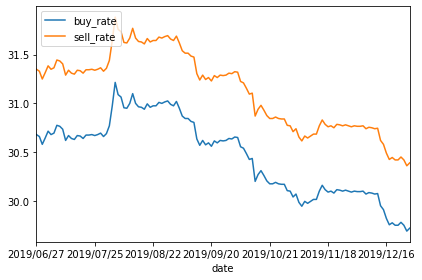

In [2]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/l6m")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式，strptime 是把字串轉成時間型態，strftime 是把時間轉成字串
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### 作業part 2：爬取每種貨幣對台幣的半年歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

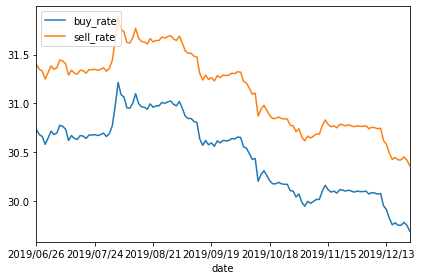


港幣(HKD)



<Figure size 720x576 with 0 Axes>

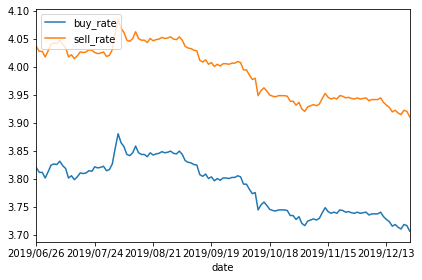


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

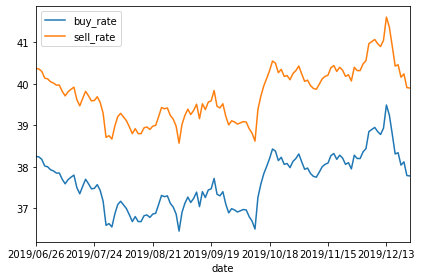


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

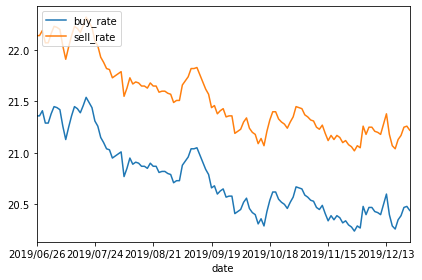


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

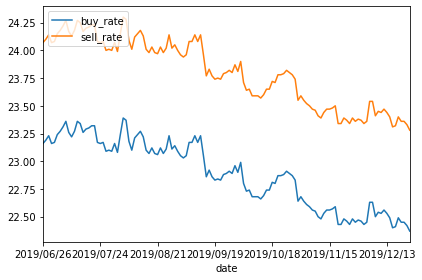


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

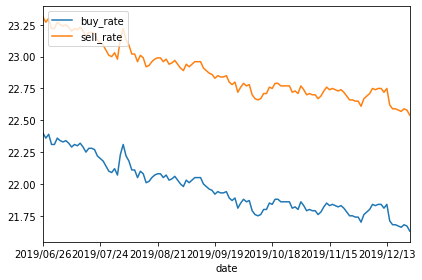


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

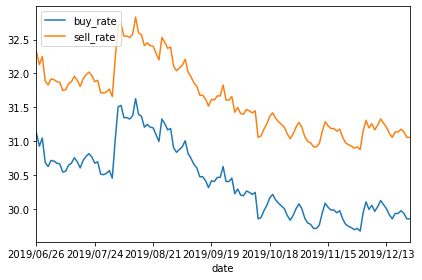


日圓(JPY)



<Figure size 720x576 with 0 Axes>

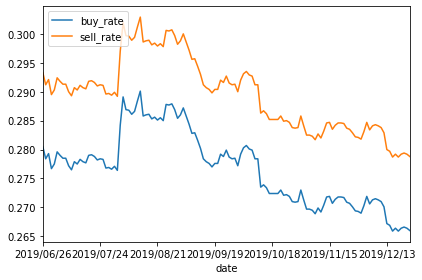


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

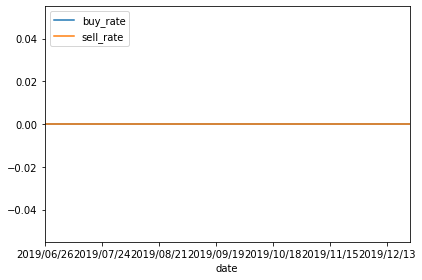


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

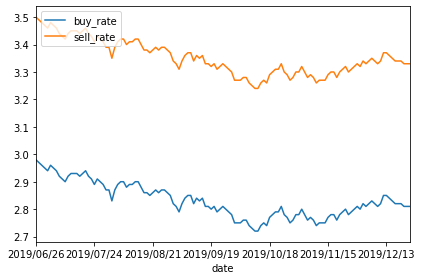


紐元(NZD)



<Figure size 720x576 with 0 Axes>

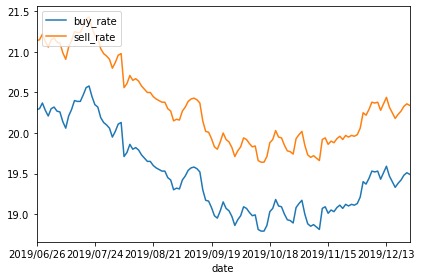


泰幣(THB)



<Figure size 720x576 with 0 Axes>

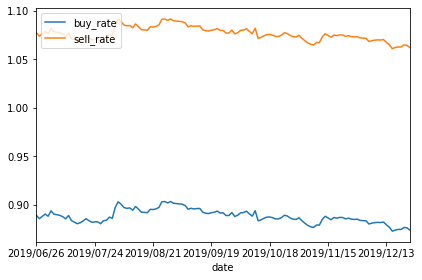


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

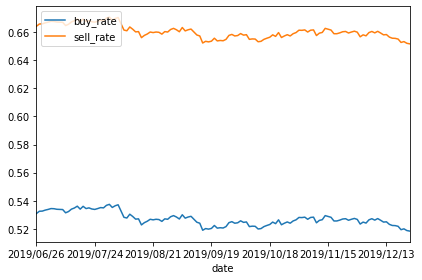


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

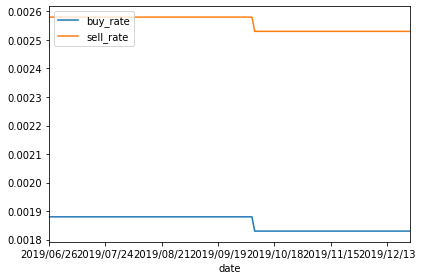


歐元(EUR)



<Figure size 720x576 with 0 Axes>

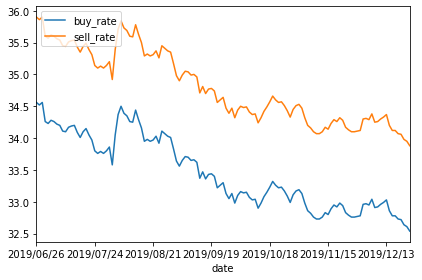


韓元(KRW)



<Figure size 720x576 with 0 Axes>

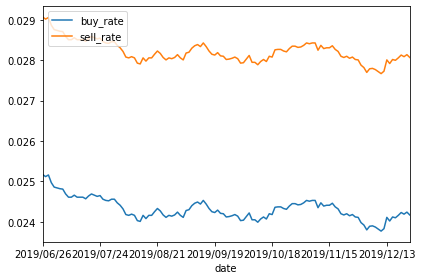


越南盾(VND)



<Figure size 720x576 with 0 Axes>

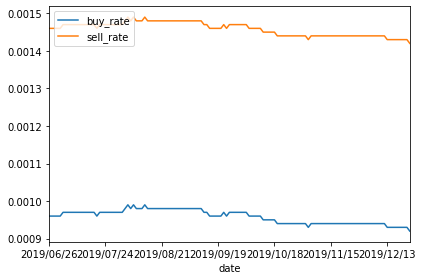


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

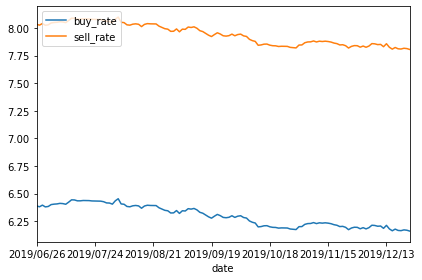


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

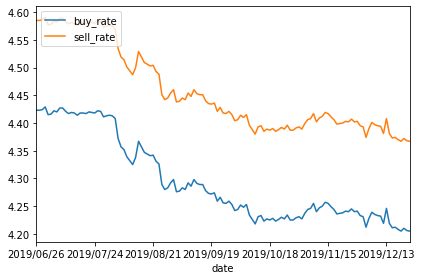

In [64]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for i in rate_table:
    # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
    currency = i.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類
    
    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = i.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁
    
    #
    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    #
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
    quote_history_url = history_rate_link.replace("history", "quote/l6m")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    history = BeautifulSoup(resp.text, "lxml")
    history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')
    
    #
    # 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
    #
    date_history = list()
    history_buy = list()
    history_sell = list()
    
    for history_rate in history_table:
        # 擷取日期資料
        date_string = history_rate.a.get_text()
        date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式，strptime 是把字串轉成時間型態，strftime 是把時間轉成字串
        date_history.append(date)  # 日期歷史資料
    
        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
        history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率
    
    # 將匯率資料建成dataframe形式
    HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                        'buy_rate':history_buy,
                                        'sell_rate':history_sell})
    
    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)
    
    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(10, 8))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.tight_layout()
    plt.show()


美金(USD)



<Figure size 720x576 with 0 Axes>

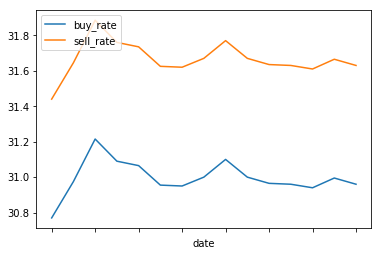


港幣(HKD)



<Figure size 720x576 with 0 Axes>

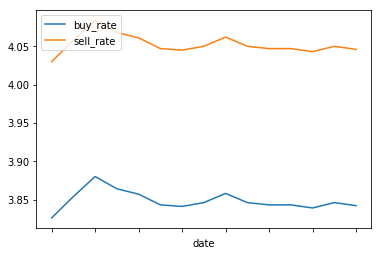


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

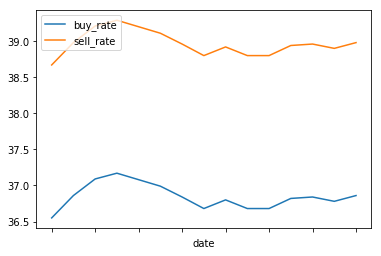


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

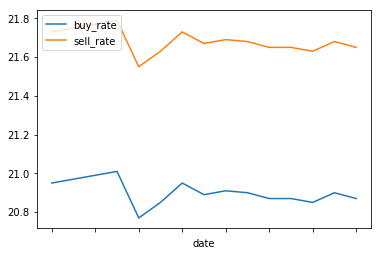


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

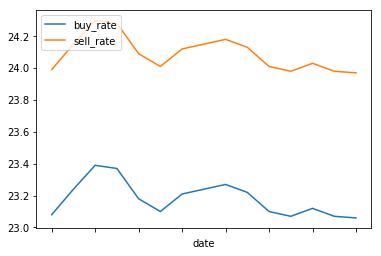


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

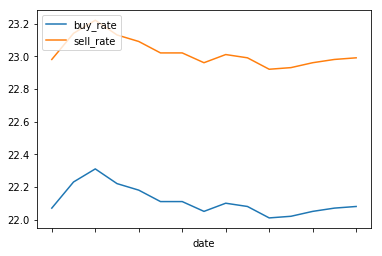


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

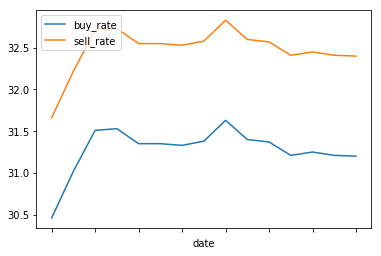


日圓(JPY)



<Figure size 720x576 with 0 Axes>

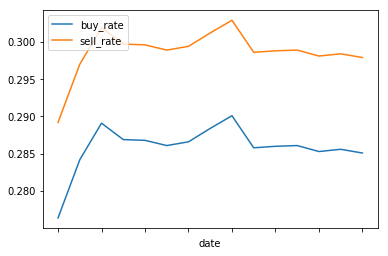


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

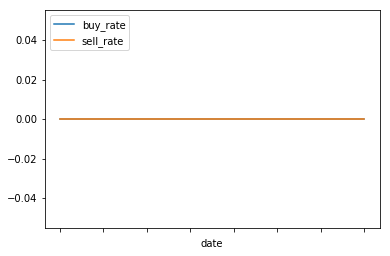


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

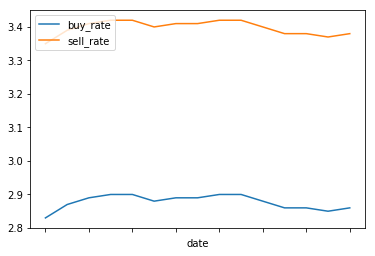


紐元(NZD)



<Figure size 720x576 with 0 Axes>

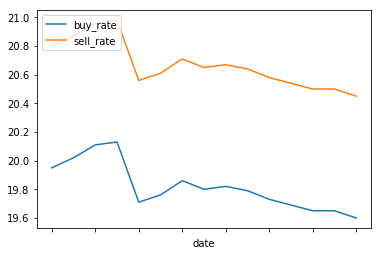


泰幣(THB)



<Figure size 720x576 with 0 Axes>

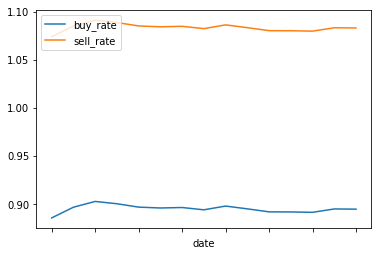


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

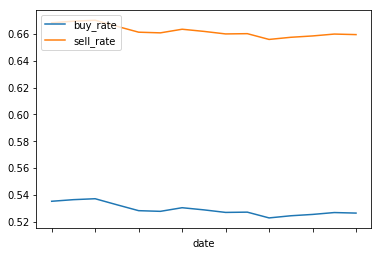


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

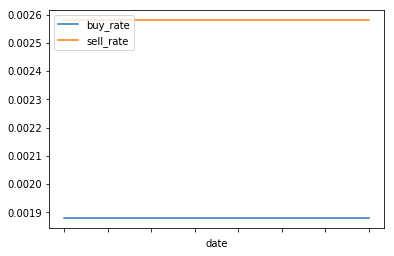


歐元(EUR)



<Figure size 720x576 with 0 Axes>

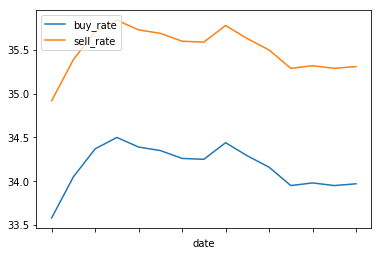


韓元(KRW)



<Figure size 720x576 with 0 Axes>

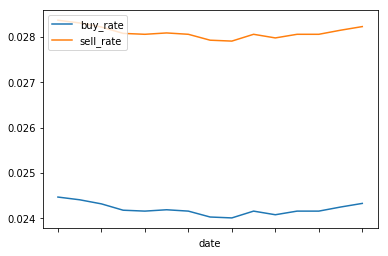


越南盾(VND)



<Figure size 720x576 with 0 Axes>

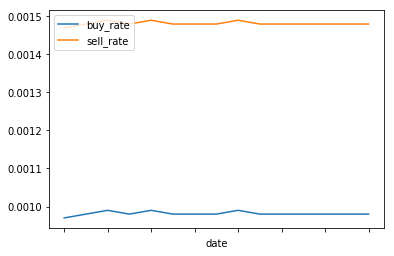


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

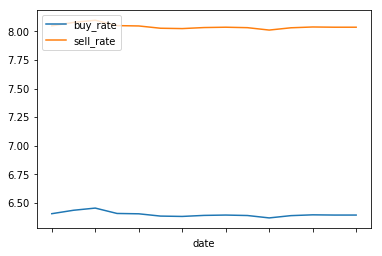


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

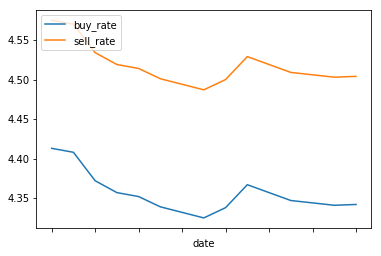

In [5]:
'''

  Your code here

'''

**利用表格繪圖**

In [81]:
dfs = pd.read_html('https://rate.bot.com.tw/xrt/quote/l6m/USD')
df = dfs[0]

In [82]:
df.columns = df.columns.get_level_values(1)  # inplace = true
df = df.dropna(axis = 'columns', how='all')
df.columns = ['date','Currency','bid(cash)','ask(cash)','bid(spot)','ask(spot)']
df = df.set_index('date')
df

,Currency,bid(cash),ask(cash),bid(spot),ask(spot)
date,,,,,
2019/12/26,美金 (USD),29.710,30.380,30.060,30.160
2019/12/25,美金 (USD),29.690,30.360,30.040,30.140
2019/12/24,美金 (USD),29.750,30.420,30.100,30.200
2019/12/23,美金 (USD),29.780,30.450,30.130,30.230
2019/12/20,美金 (USD),29.750,30.420,30.100,30.200
...,...,...,...,...,...
2019/07/03,美金 (USD),30.715,31.385,31.065,31.165
2019/07/02,美金 (USD),30.645,31.315,30.995,31.095
2019/07/01,美金 (USD),30.580,31.250,30.930,31.030


In [69]:
#df.index = pd.DatetimeIndex(df.index)

<Figure size 720x576 with 0 Axes>

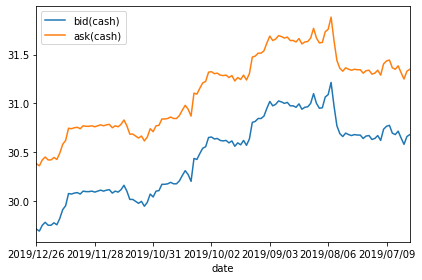

In [83]:
plt.figure(figsize=(10, 8))
df[['bid(cash)','ask(cash)']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend()
plt.tight_layout()
plt.show()


美金(USD)



<Figure size 720x576 with 0 Axes>

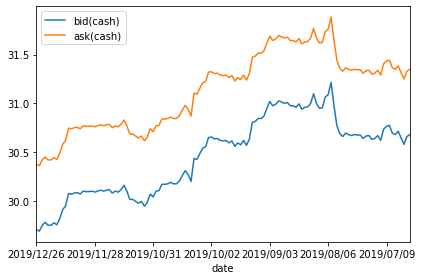


港幣(HKD)



<Figure size 720x576 with 0 Axes>

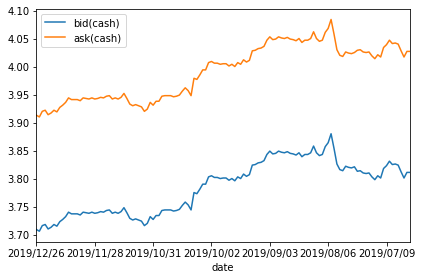


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

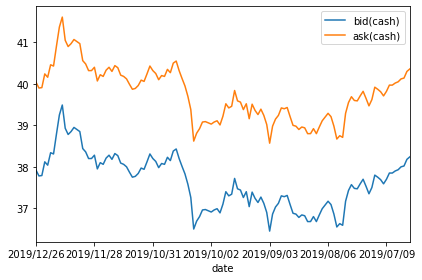


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

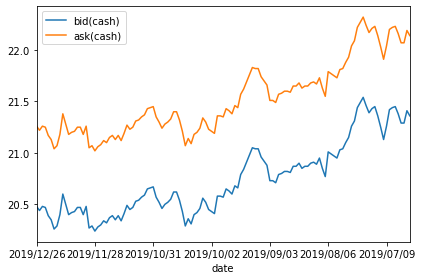


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

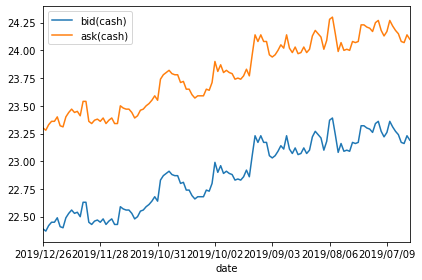


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

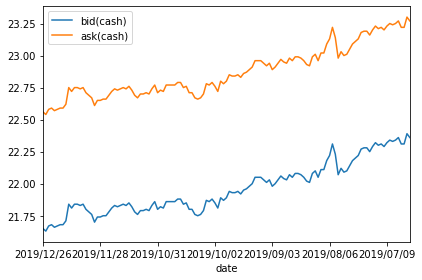


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

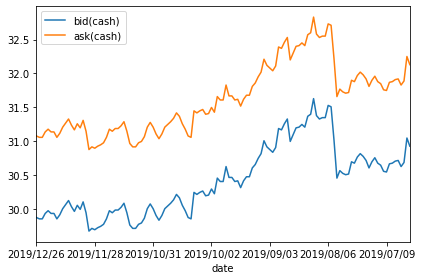


日圓(JPY)



<Figure size 720x576 with 0 Axes>

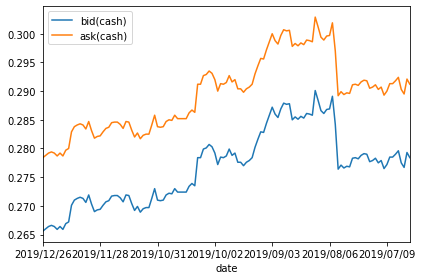


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

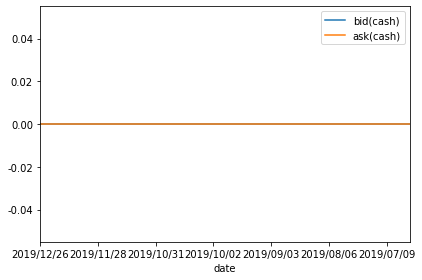


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

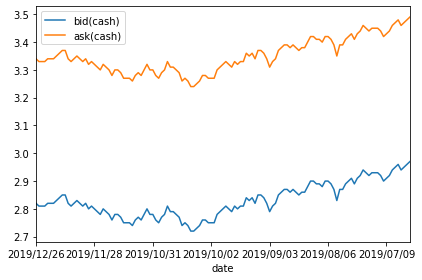


紐元(NZD)



<Figure size 720x576 with 0 Axes>

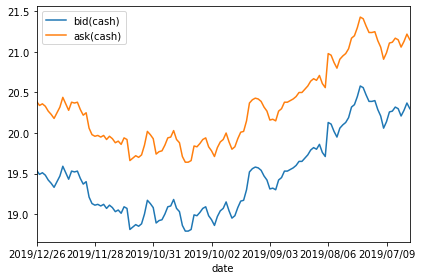


泰幣(THB)



<Figure size 720x576 with 0 Axes>

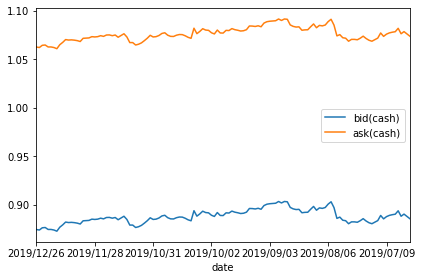


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

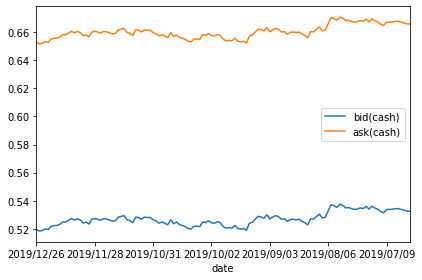


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

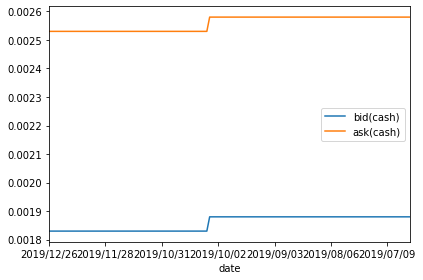


歐元(EUR)



<Figure size 720x576 with 0 Axes>

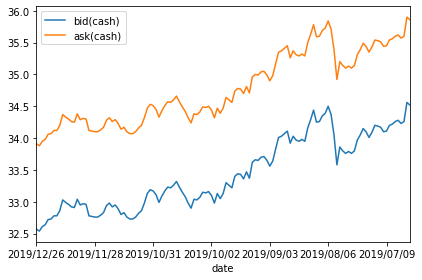


韓元(KRW)



<Figure size 720x576 with 0 Axes>

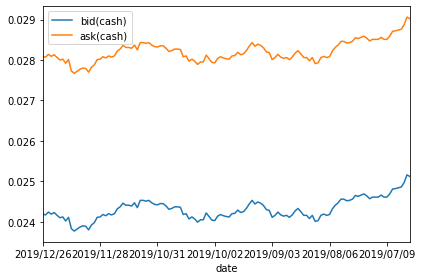


越南盾(VND)



<Figure size 720x576 with 0 Axes>

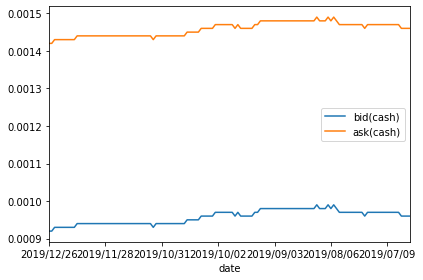


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

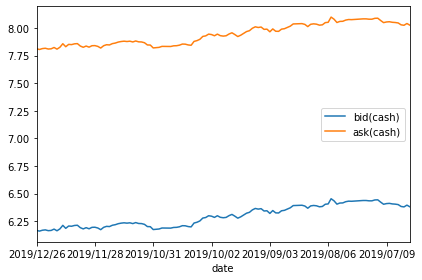


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

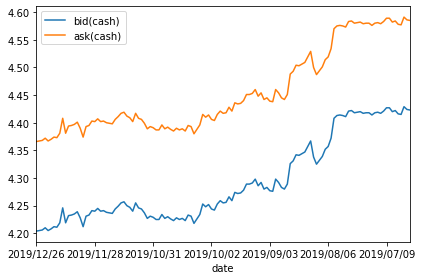

In [161]:


# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

for i in rate_table:
    # 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
    currency = i.find(name='div', attrs={'class':'visible-phone print_hide'})
    print(currency.get_text().replace(" ", ""))  # 貨幣種類
    
    # 針對美金，找到其「歷史匯率」的首頁 
    history_link = i.find(name='td', attrs={'data-table':'歷史匯率'})
    history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁
    
    #
    # 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
    #
    # 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料，此處選取半年資料
    quote_history_url = history_rate_link.replace("history", "quote/l6m")
    resp = requests.get(quote_history_url)
    resp.encoding = 'utf-8'
    #取出表格
    dfs = pd.read_html(resp.text)
    df = dfs[0]
    df.columns = df.columns.get_level_values(1)  # inplace = true
    df = df.dropna(axis = 'columns', how='all')
    df.columns = ['date','Currency','bid(cash)','ask(cash)','bid(spot)','ask(spot)']
    df = df.set_index('date')
    #繪圖
    plt.figure(figsize=(10, 8))
    df[['bid(cash)','ask(cash)']].plot()  
    plt.legend()
    plt.tight_layout()
    plt.show()